<a href="https://colab.research.google.com/github/Aleena24/DL_lab/blob/main/DL_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [135]:
import pandas as pd

In [136]:
df = pd.read_csv('/content/GME_stock.csv')
df.head()

,date,open_price,high_price,low_price,close_price,volume,adjclose_price
0,2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800.0,193.600006
1,2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700.0,347.510010
2,2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000.0,147.979996
3,2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001
4,2021-01-22,42.590000,76.760002,42.320000,65.010002,196784300.0,65.010002


#Preprocessing techniques

In [137]:
df.columns

Index(['date', 'open_price', 'high_price', 'low_price', 'close_price',
       'volume', 'adjclose_price'],
      dtype='object')

no missing values found

In [138]:
df.isnull().sum()


date              0
open_price        0
high_price        0
low_price         0
close_price       0
volume            0
adjclose_price    0
dtype: int64

In [139]:
df.drop('date', axis=1, inplace=True)


In [140]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['open_price', 'volume']] = scaler.fit_transform(df[['open_price', 'volume']])


# Splitting the Dataset

In [141]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('close_price', axis=1), df['close_price'], test_size=0.2, random_state=42)


In [142]:
if not isinstance(X_train, np.ndarray):
    X_train = X_train.to_numpy()

if not isinstance(y_train, np.ndarray):
    y_train = y_train.to_numpy()


In [143]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

# Regularization techniques with multiple hidden layers

In [144]:
import tensorflow as tf

L1 reguralization technique

In [145]:
l1_model = tf.keras.models.Sequential()

l1_model.add(tf.keras.layers.Dense(units=128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.01), input_dim=X_train.shape[1]))
l1_model.add(tf.keras.layers.Dropout(0.2))

l1_model.add(tf.keras.layers.Dense(units=64, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.01)))
l1_model.add(tf.keras.layers.Dropout(0.2))

l1_model.add(tf.keras.layers.Dense(units=32, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.01)))
l1_model.add(tf.keras.layers.Dropout(0.2))

l1_model.add(tf.keras.layers.Dense(units=16, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.01)))
l1_model.add(tf.keras.layers.Dropout(0.2))

l1_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


L2 regularization technique

In [146]:
l2_model = tf.keras.models.Sequential()

l2_model.add(tf.keras.layers.Dense(units=128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), input_dim=X_train.shape[1]))
l2_model.add(tf.keras.layers.Dropout(0.2))

l2_model.add(tf.keras.layers.Dense(units=64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
l2_model.add(tf.keras.layers.Dropout(0.2))

l2_model.add(tf.keras.layers.Dense(units=32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
l2_model.add(tf.keras.layers.Dropout(0.2))

l2_model.add(tf.keras.layers.Dense(units=16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
l2_model.add(tf.keras.layers.Dropout(0.2))

l2_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


elastic net regularization

In [147]:
elastic_net_model = tf.keras.models.Sequential()

elastic_net_model.add(tf.keras.layers.Dense(units=128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01), input_dim=X_train.shape[1]))
elastic_net_model.add(tf.keras.layers.Dropout(0.2))

elastic_net_model.add(tf.keras.layers.Dense(units=64, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)))
elastic_net_model.add(tf.keras.layers.Dropout(0.2))

elastic_net_model.add(tf.keras.layers.Dense(units=32, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)))
elastic_net_model.add(tf.keras.layers.Dropout(0.2))

elastic_net_model.add(tf.keras.layers.Dense(units=16, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)))
elastic_net_model.add(tf.keras.layers.Dropout(0.2))

elastic_net_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


# Training the Model

compiling the models l1 and l2 with Adam optimizer and mean squred error loss function

In [148]:
l1_model.compile(optimizer='adam', loss='mean_squared_error')
l2_model.compile(optimizer='adam', loss='mean_squared_error')
elastic_net_model.compile(optimizer='adam', loss='mean_squared_error')


training the models

In [149]:
# prompt: trian the models after compling the models

# Training the L1 model
l1_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Training the L2 model
l2_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Training the Elastic Net model
elastic_net_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100
120/120 [==============================] - 2s 4ms/step - loss: 733.4033 - val_loss: 630.4314
Epoch 2/100
120/120 [==============================] - 0s 3ms/step - loss: 728.2316 - val_loss: 628.8862
Epoch 3/100
120/120 [==============================] - 0s 3ms/step - loss: 727.2511 - val_loss: 628.1618
Epoch 4/100
120/120 [==============================] - 0s 3ms/step - loss: 726.5804 - val_loss: 627.5792
Epoch 5/100
120/120 [==============================] - 0s 3ms/step - loss: 726.0596 - val_loss: 627.1175
Epoch 6/100
120/120 [==============================] - 0s 3ms/step - loss: 725.6496 - val_loss: 626.7264
Epoch 7/100
120/120 [==============================] - 0s 3ms/step - loss: 725.2650 - val_loss: 626.3860
Epoch 8/100
120/120 [==============================] - 0s 3ms/step - loss: 724.9461 - val_loss: 626.0975
Epoch 9/100
120/120 [==============================] - 0s 3ms/step - loss: 724.6917 - val_loss: 625.8520
Epoch 10/100
120/120 [==============================] -

# model evaluation

In [150]:
from tensorflow.keras.metrics import mean_squared_error, mean_absolute_error

L1 model

In [151]:
l1_model_loss = l1_model.evaluate(X_test, y_test)

l1_model_mse = mean_squared_error(y_test, l1_model.predict(X_test)).numpy()

l1_model_mae = mean_absolute_error(y_test, l1_model.predict(X_test)).numpy()

#evaluation metrics
print('L1 Model:')
print('Loss:', l1_model_loss)
print('Mean Squared Error:', l1_model_mse)
print('Mean Absolute Error:', l1_model_mae)

30/30 [==============================] - 0s 1ms/step
L1 Model:
Loss: 624.2177124023438
Mean Squared Error: [624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052
 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052
 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052
 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052
 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052
 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052
 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052
 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052
 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052
 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052
 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052
 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052
 624.2052 624.205

In [152]:
import matplotlib.pyplot as plt

30/30 [==============================] - 0s 2ms/step


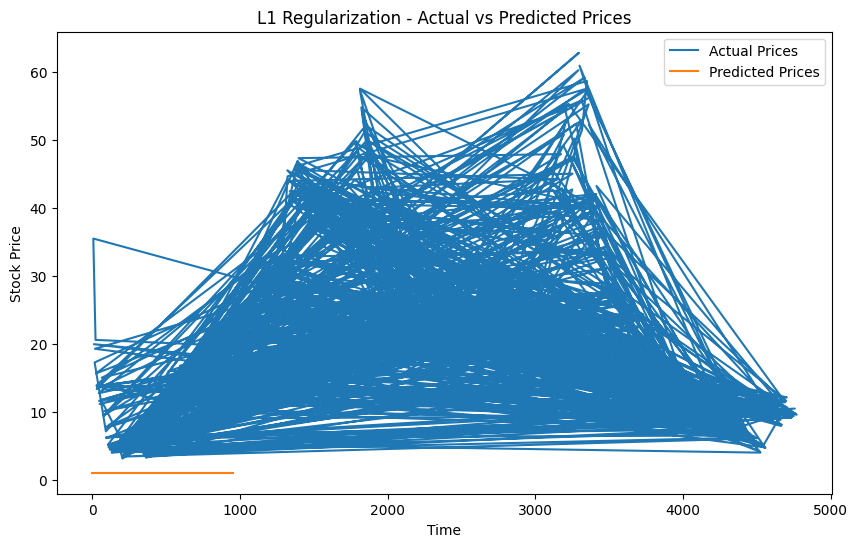

In [153]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Prices')
plt.plot(l1_model.predict(X_test), label='Predicted Prices')
plt.title('L1 Regularization - Actual vs Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


L2 Model

In [154]:
l2_model_loss = l2_model.evaluate(X_test, y_test)

l2_model_mse = mean_squared_error(y_test, l2_model.predict(X_test)).numpy()

l2_model_mae = mean_absolute_error(y_test, l2_model.predict(X_test)).numpy()

#evaluation metrics
print('L2 Model:')
print('Loss:', l2_model_loss)
print('Mean Squared Error:', l2_model_mse)
print('Mean Absolute Error:', l2_model_mae)

30/30 [==============================] - 0s 1ms/step
L2 Model:
Loss: 624.2052001953125
Mean Squared Error: [624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052
 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052
 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052
 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052
 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052
 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052
 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052
 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052
 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052
 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052
 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052
 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052
 624.2052 624.205

30/30 [==============================] - 0s 2ms/step


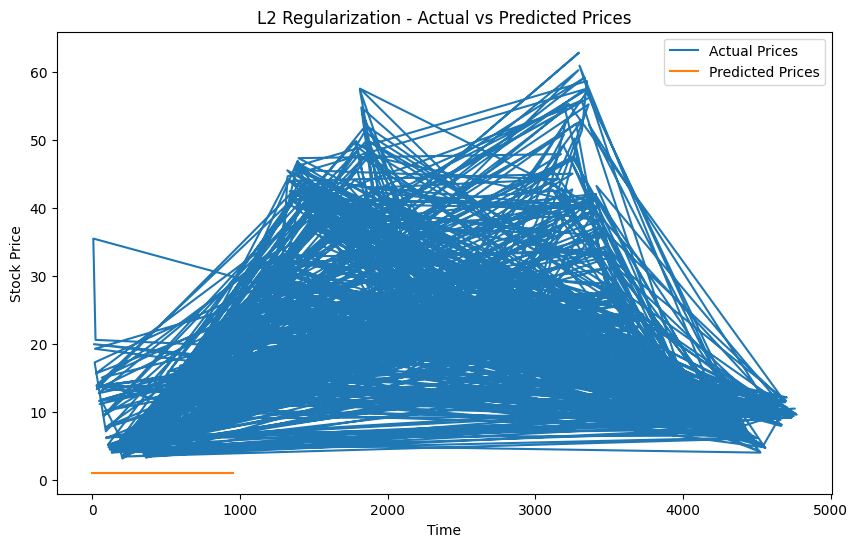

In [155]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Prices')
plt.plot(l2_model.predict(X_test), label='Predicted Prices')
plt.title('L2 Regularization - Actual vs Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

Elastic Net Model

In [156]:
en_model_loss = elastic_net_model.evaluate(X_test, y_test)

en_model_mse = mean_squared_error(y_test, elastic_net_model.predict(X_test)).numpy()

en_model_mae = mean_absolute_error(y_test, elastic_net_model.predict(X_test)).numpy()

#evaluation metrics
print('Elastic Net  Model:')
print('Loss:', en_model_loss)
print('Mean Squared Error:', en_model_mse)
print('Mean Absolute Error:', en_model_mae)



30/30 [==============================] - 0s 1ms/step
Elastic Net  Model:
Loss: 624.21826171875
Mean Squared Error: [624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052
 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052
 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052
 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052
 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052
 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052
 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052
 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052
 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052
 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052
 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052
 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052
 624.2052

30/30 [==============================] - 0s 1ms/step


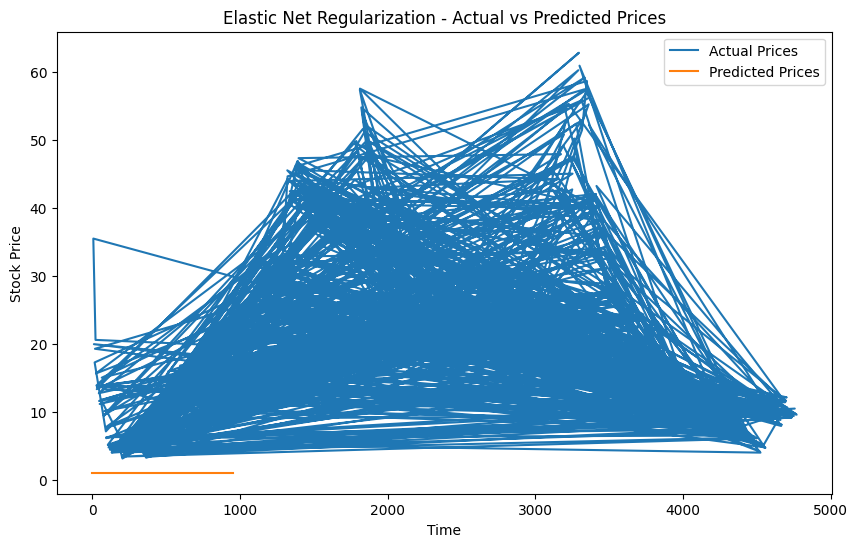

In [157]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Prices')
plt.plot(elastic_net_model.predict(X_test), label='Predicted Prices')
plt.title('Elastic Net Regularization - Actual vs Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


# Comparing regularization techniques

Loss values

In [158]:
print('Loss:')
print('L1:', l1_model_loss)
print('L2:', l2_model_loss)
print('Elastic Net:', en_model_loss)

Loss:
L1: 624.2177124023438
L2: 624.2052001953125
Elastic Net: 624.21826171875


Mean Squared error values

In [159]:
print('Mean Squared Error:')
print('L1:', l1_model_mse)
print('L2:', l2_model_mse)
print('Elastic Net:', en_model_mse)

Mean Squared Error:
L1: [624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052
 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052
 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052
 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052
 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052
 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052
 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052
 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052
 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052
 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052
 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052
 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052
 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052 624.2052
 624.2052 624.2052 624.2052

Mean Absolute values

In [160]:
print('Mean Absolute Error:')
print('L1:', l1_model_mae)
print('L2:', l2_model_mae)
print('Elastic Net:', en_model_mae)

Mean Absolute Error:
L1: [21.30579 21.30579 21.30579 21.30579 21.30579 21.30579 21.30579 21.30579
 21.30579 21.30579 21.30579 21.30579 21.30579 21.30579 21.30579 21.30579
 21.30579 21.30579 21.30579 21.30579 21.30579 21.30579 21.30579 21.30579
 21.30579 21.30579 21.30579 21.30579 21.30579 21.30579 21.30579 21.30579
 21.30579 21.30579 21.30579 21.30579 21.30579 21.30579 21.30579 21.30579
 21.30579 21.30579 21.30579 21.30579 21.30579 21.30579 21.30579 21.30579
 21.30579 21.30579 21.30579 21.30579 21.30579 21.30579 21.30579 21.30579
 21.30579 21.30579 21.30579 21.30579 21.30579 21.30579 21.30579 21.30579
 21.30579 21.30579 21.30579 21.30579 21.30579 21.30579 21.30579 21.30579
 21.30579 21.30579 21.30579 21.30579 21.30579 21.30579 21.30579 21.30579
 21.30579 21.30579 21.30579 21.30579 21.30579 21.30579 21.30579 21.30579
 21.30579 21.30579 21.30579 21.30579 21.30579 21.30579 21.30579 21.30579
 21.30579 21.30579 21.30579 21.30579 21.30579 21.30579 21.30579 21.30579
 21.30579 21.30579 21.3057

30/30 [==============================] - 0s 1ms/step


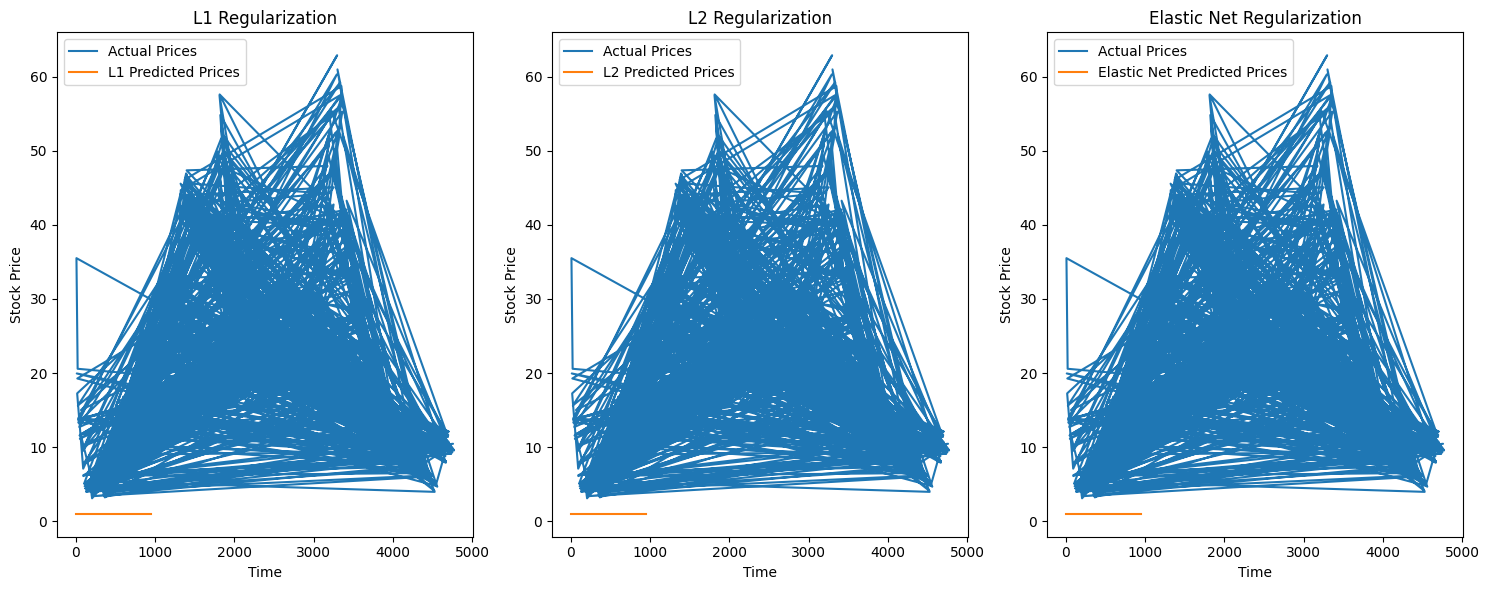

In [161]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.plot(y_test, label='Actual Prices')
plt.plot(l1_model.predict(X_test), label='L1 Predicted Prices')
plt.title('L1 Regularization')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(y_test, label='Actual Prices')
plt.plot(l2_model.predict(X_test), label='L2 Predicted Prices')
plt.title('L2 Regularization')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(y_test, label='Actual Prices')
plt.plot(elastic_net_model.predict(X_test), label='Elastic Net Predicted Prices')
plt.title('Elastic Net Regularization')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()

plt.tight_layout()
plt.show()

Model's performnce has improves using the regularisation techniques.

Among all three Elastic Net Regularization has performed better.

Dropout has improved the model's performance by preventing overfitting.

# Comparision Graph

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (3,) and arg 1 with shape (3, 955).

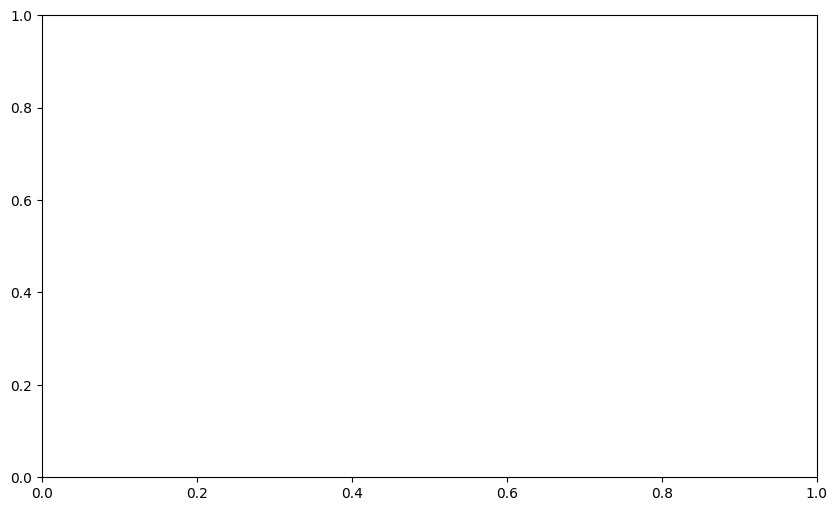

In [186]:
# prompt: generate a comparision graph showing the performnace metrics (MSE) for each regularization technique to visulaize their impact on model performnce

# Create a bar chart for the comparison
plt.figure(figsize=(10, 6))

# Set the bar positions on the x-axis
bar_positions = [1, 2, 3]

# Set the bar heights
bar_heights = [l1_model_mse, l2_model_mse, en_model_mse]

# Set the bar labels
bar_labels = ['L1', 'L2', 'Elastic Net']

# Create the bar chart
plt.bar(bar_positions, bar_heights, tick_label=bar_labels)

# Set the title and labels for the axes
plt.title('Comparison of Regularization Techniques')
plt.xlabel('Regularization Technique')
plt.ylabel('Mean Squared Error')

# Show the plot
plt.show()
